In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('Resume/Resume.csv')
df.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [6]:
df = df.drop('Resume_html', axis=1)
display(df.head())

,ID,Resume_str,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...",HR
2,33176873,HR DIRECTOR Summary Over 2...,HR
3,27018550,HR SPECIALIST Summary Dedica...,HR
4,17812897,HR MANAGER Skill Highlights ...,HR


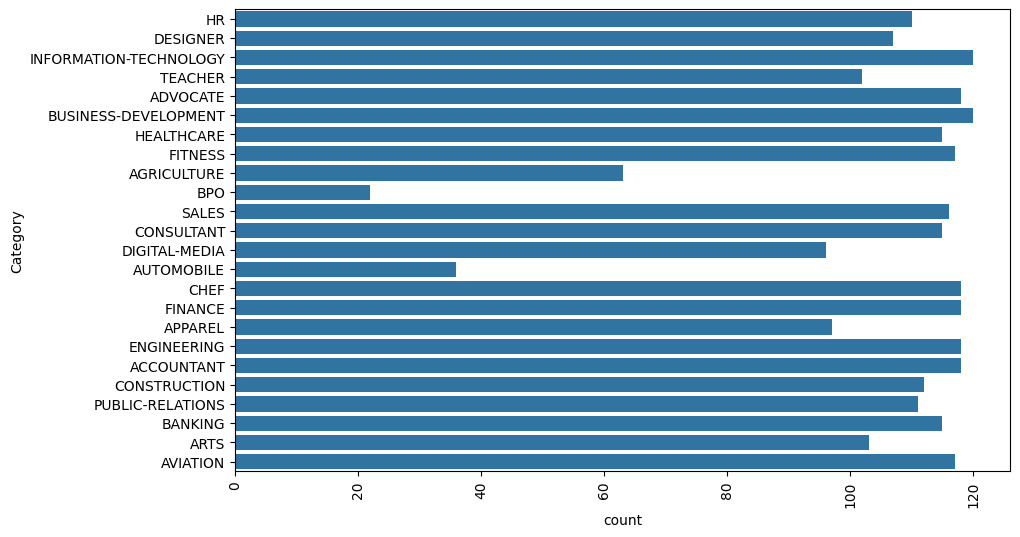

In [7]:
plt.figure(figsize=(10,6))
sns.countplot(df['Category'])
plt.xticks(rotation=90)
plt.show()

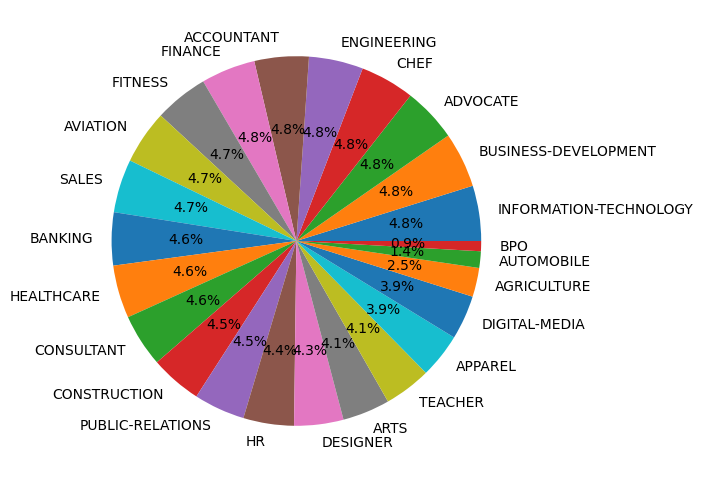

In [8]:
counts=df['Category'].value_counts()
labels=counts.index
plt.figure(figsize=(15,6))
plt.pie(counts,labels=counts.index,autopct='%1.1f%%')
plt.show()

In [9]:
from sklearn.utils import resample
max_count=df['Category'].value_counts().max()
balance_data=[]
for category in df['Category'].unique():
    category_df=df[df['Category']==category]
    if len(category_df)<max_count:
      sampled_df=resample(category_df,replace=True,n_samples=max_count,random_state=42)
    else:
      sampled_df=category_df
    balance_data.append(sampled_df)
balances_df=pd.concat(balance_data)



In [10]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
balances_df['Category_Encoded'] = label_encoder.fit_transform(balances_df['Category'])

In [11]:
x=balances_df['Resume_str']
y=balances_df['Category_Encoded']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [12]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((2304,), (576,), (2304,), (576,))

In [13]:
tf_vectoriser=TfidfVectorizer()
tf_x_train=tf_vectoriser.fit_transform(x_train)
tf_x_test=tf_vectoriser.transform(x_test)


In [14]:
rf_calassification=RandomForestClassifier()
rf_calassification.fit(tf_x_train,y_train)
y_pred=rf_calassification.predict(tf_x_test)
accuracy=accuracy_score(y_pred,y_test)
print("Accuracy:",accuracy)

Accuracy: 0.8368055555555556


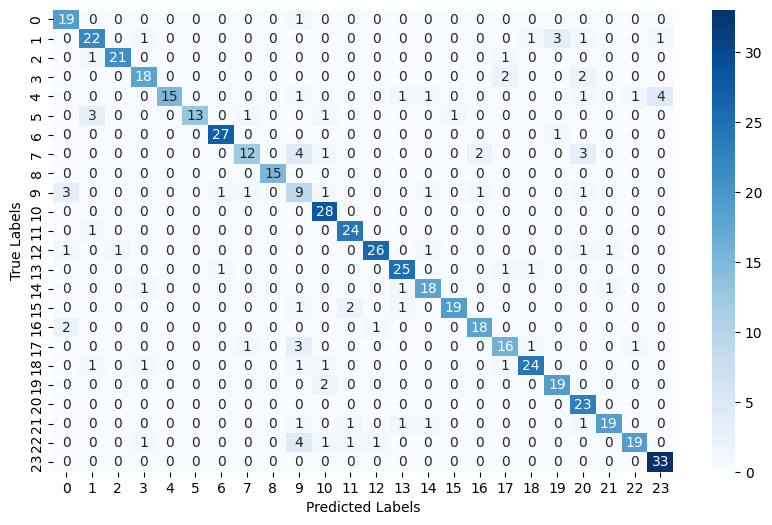

In [15]:
con_matrix=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,6))
sns.heatmap(con_matrix,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [16]:
def predict_category(resume_text):
  """Predicts the category of a given resume text."""
  # Vectorize the input resume text
  vectorized_resume = tf_vectoriser.transform([resume_text])

  # Predict the category
  predicted_encoded_category = rf_calassification.predict(vectorized_resume)[0]

  # Inverse transform the predicted category to get the original label
  predicted_category = label_encoder.inverse_transform([predicted_encoded_category])[0]

  return predicted_category

In [17]:
#sample resume text for prediction
# Select a resume from the balances_df DataFrame
sample_resume = balances_df['Resume_str'].iloc[65] # You can change the index to select a different resume

# Predict the category of the sample resume
predicted_category = predict_category(sample_resume)

print(f"The predicted category for the resume is: {predicted_category}")

The predicted category for the resume is: HR


In [23]:
import pickle
import os
if not os.path.exists('models'):
    os.makedirs('models')
pickle.dump(rf_calassification,open('models/rf_classifier_categorization.pkl','wb'))
pickle.dump(tf_vectoriser,open('models/tfidf_vectorizer_categorization.pkl','wb'))
# Add this to your notebook after training
pickle.dump(label_encoder, open('models/label_encoder.pkl', 'wb'))